In [4892]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4893]:
marketting=pd.read_csv('PuCon_bank_marketing_data.csv')
CustDeet=pd.read_csv('PuCon_Customer_Details_dataset.csv')
Featurs_addi=pd.read_csv('PuCon_file_for_additional_training_model.csv')
Test=pd.read_csv('PuCon_file_for_getting_prediction.csv')
Train=pd.read_csv('PuCon_file_for_training_model.csv')
sol=pd.read_csv('PuCon_file_for_solution_submission.csv')

In [4894]:
column_to_move = Train.pop("Loan ID")

# insert column with insert(location, column_name, column_value)

Train.insert(0, "Loan ID", column_to_move)

In [4895]:
Featurs_addi

,Loan ID,Employment Status,Loan Security Type,Loan Default History,Loan Utilization Ratio,Monthly Debt,Years of Credit History,Years in current job,Number of Credit Problems,Credit Score,Loan Repayment Terms,Loan Decision,Maximum Open Credit
0,5c86a82b-4a36-4a16-adf0-0fd42039576d,Missing,Invalid,Missing,Invalid,3306.57,25.5,10+ years,0.0,751.0,Missing,NaN,2652232.0
1,c9e34549-4536-4041-a128-b903b9f1cbe0,Invalid,Invalid,Missing,Missing,11336.35,12.5,10+ years,0.0,694.0,Missing,Fully Paid,773762.0
2,0aacf8ff-fdb6-4479-af1c-50936513a5c0,Invalid,Missing,Missing,Missing,8029.40,21.3,7 years,0.0,747.0,Invalid,Fully Paid,751124.0
3,dd0000b5-39df-4317-b322-53580b04bbf1,Missing,Unknown,Unknown,Unknown,22899.94,15.5,5 years,0.0,620.0,Invalid,Fully Paid,670340.0
4,f45207bc-5b68-4560-81e8-d5ee4f1d8fa3,Missing,Invalid,Unknown,Invalid,31122.95,19.4,10+ years,0.0,716.0,Invalid,NaN,975766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87279,NaN,Invalid,Invalid,Invalid,Unknown,NaN,NaN,NaN,NaN,NaN,Missing,Charged Off,NaN
87280,NaN,Invalid,Unknown,Missing,Invalid,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
87281,NaN,Unknown,Unknown,Unknown,Invalid,NaN,NaN,NaN,NaN,NaN,Invalid,Fully Paid,NaN
87282,NaN,Unknown,Missing,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,Invalid,NaN,NaN


In [4896]:
CustDeet

,CustomerID,DateOfBirth,Gender,City,AccountBalance,HavingFD,HavingCC,CIBIL_Score,HavingLoan,RV
0,C6532335,1990-04-01,M,ABHANPUR,25025.0,0,0,775,0,51384.0
1,C6232347,1990-04-01,M,ABHANPUR,25025.0,1,0,765,0,94271.0
2,C4284828,1994-05-13,F,ABOHAR,1985.0,0,0,373,0,83163.0
3,C8784892,1994-05-13,F,ABOHAR,1985.0,0,0,676,0,1985.0
4,C5416341,1991-12-04,F,ABOHAR,3.0,0,0,513,0,149484.0
...,...,...,...,...,...,...,...,...,...,...
949034,C4419992,1975-06-07,M,ZIRKPUR,35142.0,1,0,427,1,95666.0
949035,C6833956,1991-07-07,M,ZUARINAGAR,17339.0,1,0,426,1,109400.0
949036,C8633976,1991-07-07,M,ZUARINAGAR,17339.0,1,0,654,1,159565.0
949037,C4333985,1991-07-07,M,ZUARINAGAR,17339.0,1,0,530,0,136015.0


In [4897]:
Test

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,...,Loan Grade,Employment Length,Interest Rate,Loan Purpose Category,Debt-to-Income Ratio,Loan-to-Value Ratio,Credit Utilization,Revolving Balance,Loan Payment History,Loan Repayment Period
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,445412,Short Term,709,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,...,Unknown,10+ years,3.15%,Debt Consolidaton,1.26,0.02,18.13%,"$21,295.67",On time,29 months
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,...,Unknown,8 years,5.79%,NaN,0.42,0.90,55.16%,"$10,394.99",On time,49 months
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,99999999,Short Term,741,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,...,G,5 years,9.98%,Medicla,1.39,0.02,40.66%,"$64,515.53",NaN,34 months
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,347666,Long Term,721,806949.0,3 years,Own Home,Debt Consolidation,8741.90,...,Z,6 years,2.98%,Debt Consolidaton,1.32,0.87,44.29%,"$5,393.50",No,33 months
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,...,A,7 years,5.25%,Home Improvemnt,1.26,0.12,93.54%,"$6,266.00",Unknown,50 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,084f0ba2-204c-4b43-a131-5a72142e513c,1c96581f-1e05-40ca-997a-7bb62b16b6be,143594,Short Term,736,1024917.0,4 years,Home Mortgage,other,12982.13,...,B,1 year,11.09%,Home Improvemnt,1.23,0.14,71.71%,"$38,325.20",Late,56 months
9824,86c20a91-92d1-4dcd-bf73-9f1392b77519,7bf1820e-7de2-4e5b-a259-57cfa20d070c,400158,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,7084.53,...,B,3 years,13.29%,NaN,0.13,0.32,64.44%,"$91,299.98",Late,45 months
9825,c062a82a-cf71-425b-a152-f38bdaccc408,7a93d940-5c07-4c5c-9774-62be30aa9e54,154462,Short Term,751,833796.0,9 years,Home Mortgage,other,10630.88,...,Unknown,3 years,5.43%,Vacaton,0.22,0.96,88.64%,"$62,732.16",Yes,14 months
9826,7a36b0f6-1c19-4984-87d7-d4db3e6ea260,ca417f48-23e0-447a-b0e2-13e0c4f42f26,264484,Short Term,733,1427565.0,2 years,Rent,Debt Consolidation,28313.42,...,H,9 years,14.88%,Medicla,1.03,0.00,94.15%,"$76,610.31",Yes,60 months


In [4898]:
sorted(Test)

['Annual Income',
 'Bankruptcies',
 'Credit Score',
 'Credit Utilization',
 'Current Credit Balance',
 'Current Loan Amount',
 'Customer ID',
 'Debt-to-Income Ratio',
 'Employment Length',
 'Home Ownership',
 'Interest Rate',
 'Loan Grade',
 'Loan ID',
 'Loan Payment History',
 'Loan Purpose Category',
 'Loan Repayment Period',
 'Loan-to-Value Ratio',
 'Maximum Open Credit',
 'Monthly Debt',
 'Months since last delinquent',
 'Number of Credit Problems',
 'Number of Open Accounts',
 'Purpose',
 'Revolving Balance',
 'Tax Liens',
 'Term',
 'Years in current job',
 'Years of Credit History']

In [4899]:
Featurs_addi

,Loan ID,Employment Status,Loan Security Type,Loan Default History,Loan Utilization Ratio,Monthly Debt,Years of Credit History,Years in current job,Number of Credit Problems,Credit Score,Loan Repayment Terms,Loan Decision,Maximum Open Credit
0,5c86a82b-4a36-4a16-adf0-0fd42039576d,Missing,Invalid,Missing,Invalid,3306.57,25.5,10+ years,0.0,751.0,Missing,NaN,2652232.0
1,c9e34549-4536-4041-a128-b903b9f1cbe0,Invalid,Invalid,Missing,Missing,11336.35,12.5,10+ years,0.0,694.0,Missing,Fully Paid,773762.0
2,0aacf8ff-fdb6-4479-af1c-50936513a5c0,Invalid,Missing,Missing,Missing,8029.40,21.3,7 years,0.0,747.0,Invalid,Fully Paid,751124.0
3,dd0000b5-39df-4317-b322-53580b04bbf1,Missing,Unknown,Unknown,Unknown,22899.94,15.5,5 years,0.0,620.0,Invalid,Fully Paid,670340.0
4,f45207bc-5b68-4560-81e8-d5ee4f1d8fa3,Missing,Invalid,Unknown,Invalid,31122.95,19.4,10+ years,0.0,716.0,Invalid,NaN,975766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87279,NaN,Invalid,Invalid,Invalid,Unknown,NaN,NaN,NaN,NaN,NaN,Missing,Charged Off,NaN
87280,NaN,Invalid,Unknown,Missing,Invalid,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
87281,NaN,Unknown,Unknown,Unknown,Invalid,NaN,NaN,NaN,NaN,NaN,Invalid,Fully Paid,NaN
87282,NaN,Unknown,Missing,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,Invalid,NaN,NaN


In [4900]:
Train.columns

Index(['Loan ID', 'Employment Status', 'Home Ownership', 'Status of Loan',
       'Loan Security Type', 'Loan Default History', 'Number of Open Accounts',
       'Loan Utilization Ratio', 'Monthly Debt', 'Years of Credit History',
       'Years in current job', 'Number of Credit Problems', 'Credit Score',
       'Loan Repayment Terms', 'Loan Decision', 'Maximum Open Credit',
       'Current Credit Balance', 'Loan Approval Date', 'Loan Amount Repaid',
       'Months since last delinquent', 'Loan Status', 'Loan Outcome',
       'Borrower's Risk Assessment', 'Current Loan Amount',
       'Loan Approval Status', 'Bankruptcies', 'Annual Income', 'Customer ID',
       'Term', 'Tax Liens', 'Purpose', 'Interest Payment Frequency',
       'Credit History Length'],
      dtype='object')

In [4901]:
Train['Tax Liens'].value_counts(),Train['Tax Liens'].isna().sum()

(0.0     85144
 1.0      1119
 2.0       317
 3.0        94
 4.0        54
 5.0        13
 7.0         7
 6.0         6
 9.0         3
 11.0        2
 15.0        1
 10.0        1
 Name: Tax Liens, dtype: int64,
 523)

In [4902]:
Train=Train.dropna(axis=0, subset=['Loan Status'])

In [4903]:
Train['Purpose'].value_counts(),Train['Purpose'].isna().sum()

(Debt Consolidation      68163
 other                    5193
 Home Improvements        5108
 Other                    2813
 Business Loan            1365
 Buy a Car                1102
 Medical Bills             980
 Buy House                 591
 Take a Trip               493
 major_purchase            307
 small_business            244
 moving                    135
 wedding                   107
 Educational Expenses       81
 vacation                   78
 renewable_energy           10
 Name: Purpose, dtype: int64,
 0)

In [4904]:
Train['Interest Payment Frequency'].value_counts(),Train['Interest Payment Frequency'].isna().sum()

(Missing    28999
 Invalid    28890
 Unknown    28881
 Name: Interest Payment Frequency, dtype: int64,
 0)

In [4905]:
Train['Credit History Length'].value_counts(),Train['Credit History Length'].isna().sum()

(Invalid    28950
 Unknown    28939
 Missing    28881
 Name: Credit History Length, dtype: int64,
 0)

In [4906]:
Train['Term'].value_counts(),Train['Term'].isna().sum()

(Short Term    63094
 Long Term     23676
 Name: Term, dtype: int64,
 0)

In [4907]:
Train['Customer ID'].value_counts(),Train['Customer ID'].isna().sum()

(bfd604b3-cdc6-4c2f-97e3-e97fc797e113    2
 555443f8-bfd0-4b21-af3b-f5b49bf851cd    2
 00742868-e4c0-4c2b-8686-8ff757941b8f    2
 351c4ec8-ecf9-4d25-9426-5734c8d49235    2
 09c62126-c722-4a3d-b84d-43ea59e99bd3    2
                                        ..
 17f878e0-7bef-48e2-9fbc-1941f6baff5e    1
 96ae855a-d9b4-4339-b0c4-335024283ba0    1
 d8b5d99f-3367-4b34-93e2-4f88f9dce5ae    1
 be6a31e5-26a3-4846-be80-08b987a197a6    1
 1b3014be-5c07-4d41-abe7-44573c375886    1
 Name: Customer ID, Length: 72171, dtype: int64,
 0)

In [4908]:
Train['Annual Income'].value_counts(),Train['Annual Income'].isna().sum()

(1162572.0    19
 969475.0     17
 949905.0     17
 1140000.0    17
 847647.0     15
              ..
 2337703.0     1
 847685.0      1
 1485382.0     1
 974909.0      1
 1289416.0     1
 Name: Annual Income, Length: 33315, dtype: int64,
 16839)

In [4909]:
Train['Bankruptcies'].value_counts(),Train['Bankruptcies'].isna().sum()

(0.0    77128
 1.0     8987
 2.0      354
 3.0       85
 4.0       25
 5.0        4
 6.0        2
 7.0        1
 Name: Bankruptcies, dtype: int64,
 184)

In [4910]:
Train['Loan Approval Status'].value_counts(),Train['Loan Approval Status'].isna().sum()

(Fully Paid     29015
 Charged Off    28831
 Name: Loan Approval Status, dtype: int64,
 28924)

In [4911]:
Train['Current Loan Amount'].value_counts(),Train['Current Loan Amount'].isna().sum()

(99999999.0    10043
 223322.0         25
 216194.0         24
 216810.0         24
 223652.0         23
               ...  
 255288.0          1
 476696.0          1
 417472.0          1
 537394.0          1
 274076.0          1
 Name: Current Loan Amount, Length: 21013, dtype: int64,
 0)

In [4912]:
Train['Borrower\'s Risk Assessment'].value_counts(),Train['Borrower\'s Risk Assessment'].isna().sum()

(Unknown    29141
 Invalid    28953
 Missing    28676
 Name: Borrower's Risk Assessment, dtype: int64,
 0)

In [4913]:
Train['Loan Outcome'].value_counts(),Train['Loan Outcome'].isna().sum()

(Fully Paid     29186
 Charged Off    28737
 Name: Loan Outcome, dtype: int64,
 28847)

In [4914]:
Train['Loan Status'].value_counts(),Train['Loan Status'].isna().sum()

(Fully Paid     66438
 Charged Off    20332
 Name: Loan Status, dtype: int64,
 0)

In [4915]:
Train['Months since last delinquent'].value_counts(),Train['Months since last delinquent'].isna().sum()

(13.0     802
 12.0     778
 10.0     756
 14.0     750
 9.0      748
         ... 
 93.0       1
 130.0      1
 129.0      1
 107.0      1
 131.0      1
 Name: Months since last delinquent, Length: 111, dtype: int64,
 46351)

In [4916]:
Train['Loan Amount Repaid'].value_counts(),Train['Loan Amount Repaid'].isna().sum()

(Missing    29037
 Unknown    29011
 Invalid    28722
 Name: Loan Amount Repaid, dtype: int64,
 0)

In [4917]:
Train['Loan Approval Date'].value_counts(),Train['Loan Approval Date'].isna().sum()

(Missing    28973
 Unknown    28934
 Invalid    28863
 Name: Loan Approval Date, dtype: int64,
 0)

In [4918]:
Train['Current Credit Balance'].value_counts(),Train['Current Credit Balance'].isna().sum()

(0.0         502
 124013.0     16
 100301.0     15
 111682.0     15
 131613.0     15
            ... 
 560918.0      1
 663746.0      1
 655044.0      1
 196384.0      1
 404225.0      1
 Name: Current Credit Balance, Length: 31046, dtype: int64,
 0)

In [4919]:
Train['Maximum Open Credit'].value_counts(),Train['Maximum Open Credit'].isna().sum()

(0.0          596
 201652.0      12
 155474.0      12
 236412.0      12
 150194.0      12
             ... 
 2325114.0      1
 43450.0        1
 1391830.0      1
 2114310.0      1
 892606.0       1
 Name: Maximum Open Credit, Length: 41522, dtype: int64,
 2)

In [4920]:
Train['Loan Decision'].value_counts(),Train['Loan Decision'].isna().sum()

(Fully Paid     28987
 Charged Off    28878
 Name: Loan Decision, dtype: int64,
 28905)

In [4921]:
Train['Loan Decision'].value_counts(),Train['Loan Decision'].isna().sum()

(Fully Paid     28987
 Charged Off    28878
 Name: Loan Decision, dtype: int64,
 28905)

In [4922]:
Train['Loan Repayment Terms'].value_counts(),Train['Loan Repayment Terms'].isna().sum()

(Missing    29033
 Unknown    28895
 Invalid    28842
 Name: Loan Repayment Terms, dtype: int64,
 0)

In [4923]:
Train['Credit Score'].value_counts()

747.0     1633
746.0     1587
740.0     1568
742.0     1566
741.0     1562
          ... 
6070.0       1
6010.0       1
6200.0       1
5900.0       1
6050.0       1
Name: Credit Score, Length: 322, dtype: int64

In [4924]:
Train['Number of Credit Problems'].value_counts(),Train['Number of Credit Problems'].isna().sum()

(0.0     74811
 1.0     10336
 2.0      1123
 3.0       324
 4.0       107
 5.0        42
 6.0        10
 7.0         5
 8.0         4
 11.0        2
 10.0        2
 9.0         2
 15.0        1
 12.0        1
 Name: Number of Credit Problems, dtype: int64,
 0)

In [4925]:
Train['Loan ID'].isna().sum()

0

In [4926]:
Train['Years in current job'].value_counts(),Train['Years in current job'].isna().sum()

(10+ years    26932
 2 years       7978
 3 years       7122
 < 1 year      7082
 5 years       5915
 1 year        5617
 4 years       5297
 6 years       4892
 7 years       4871
 8 years       3985
 9 years       3417
 Name: Years in current job, dtype: int64,
 3662)

In [4927]:
Train['Years of Credit History'].value_counts(),Train['Years of Credit History'].isna().sum()

(16.0    1174
 15.0    1131
 17.0    1060
 16.5    1018
 14.0     986
         ... 
 50.8       1
 54.0       1
 58.0       1
 50.9       1
 53.8       1
 Name: Years of Credit History, Length: 501, dtype: int64,
 0)

In [4928]:
Train['Monthly Debt'].value_counts(),Train['Monthly Debt'].isna().sum()

(0.00        63
 15903.00     9
 11162.88     8
 13033.43     8
 15343.07     8
             ..
 21760.32     1
 25665.01     1
 28023.10     1
 14559.32     1
 9118.10      1
 Name: Monthly Debt, Length: 59296, dtype: int64,
 0)

In [4929]:
Train['Employment Status'].value_counts()

Missing    29096
Invalid    28925
Unknown    28749
Name: Employment Status, dtype: int64

In [4930]:
Train

,Loan ID,Employment Status,Home Ownership,Status of Loan,Loan Security Type,Loan Default History,Number of Open Accounts,Loan Utilization Ratio,Monthly Debt,Years of Credit History,...,Current Loan Amount,Loan Approval Status,Bankruptcies,Annual Income,Customer ID,Term,Tax Liens,Purpose,Interest Payment Frequency,Credit History Length
0,5c86a82b-4a36-4a16-adf0-0fd42039576d,Missing,Own Home,Charged Off,Invalid,Missing,12.0,Invalid,3306.57,25.5,...,159346.0,NaN,0.0,987012.0,f53893a4-3333-4517-afce-7e0c7e8d2789,Short Term,0.0,Home Improvements,Invalid,Invalid
1,c9e34549-4536-4041-a128-b903b9f1cbe0,Invalid,Home Mortgage,NaN,Invalid,Missing,23.0,Missing,11336.35,12.5,...,210760.0,Fully Paid,0.0,860985.0,866308f8-2df5-4615-aa03-e9db13e967b3,Short Term,0.0,Debt Consolidation,Unknown,Invalid
2,0aacf8ff-fdb6-4479-af1c-50936513a5c0,Invalid,Own Home,NaN,Missing,Missing,4.0,Missing,8029.40,21.3,...,205766.0,Charged Off,0.0,526528.0,0b0e3c5e-f399-4360-b31c-eb3f94e7d4f4,Short Term,0.0,Debt Consolidation,Invalid,Invalid
3,dd0000b5-39df-4317-b322-53580b04bbf1,Missing,Home Mortgage,Charged Off,Unknown,Unknown,19.0,Unknown,22899.94,15.5,...,405768.0,Charged Off,0.0,974472.0,f32441ad-2f67-46ac-a10a-10296b4034ec,Long Term,0.0,Debt Consolidation,Missing,Missing
4,f45207bc-5b68-4560-81e8-d5ee4f1d8fa3,Missing,Rent,Charged Off,Invalid,Unknown,9.0,Invalid,31122.95,19.4,...,355520.0,Fully Paid,0.0,1420060.0,6a004d25-2833-4d0d-85c3-7b7019710752,Short Term,0.0,Debt Consolidation,Invalid,Invalid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86765,3f94c18c-ba8f-45d0-8610-88a684a410a9,Invalid,Own Home,Charged Off,Missing,Unknown,5.0,Unknown,2202.86,22.3,...,147070.0,Charged Off,0.0,475437.0,2da51983-cfef-4b8f-a733-5dfaf69e9281,Short Term,0.0,other,Invalid,Missing
86766,06eba04f-58fc-424a-b666-ed72aa008900,Missing,Rent,Charged Off,Missing,Missing,22.0,Missing,13109.05,9.4,...,99999999.0,NaN,0.0,1289416.0,77f2252a-b7d1-4b07-a746-1202a8304290,Short Term,0.0,Debt Consolidation,Invalid,Invalid
86767,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,Invalid,Rent,Charged Off,Invalid,Invalid,12.0,Unknown,7315.57,18.8,...,103136.0,Fully Paid,1.0,1150545.0,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Short Term,0.0,Debt Consolidation,Missing,Missing
86768,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,Invalid,Rent,NaN,Missing,Invalid,8.0,Unknown,9890.07,15.0,...,530332.0,NaN,0.0,1717524.0,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Short Term,0.0,Debt Consolidation,Unknown,Missing


In [4931]:
def factorize_categorical_columns(df):
# Define the mapping
    mapping = {'Invalid': 0, 'Unknown': 1, 'Missing': 2}

# Apply the mapping to all categorical columns in the DataFrame
    for col in Train.columns:
        if Train[col].dtype == 'object':  # if the column is categorical
            Train[col] = Train[col].replace(mapping)

        return df

# apply function on your DataFrame
Train = factorize_categorical_columns(Train)


In [4932]:
Train['Loan Default History'].dtype

dtype('O')

In [4933]:
Train

,Loan ID,Employment Status,Home Ownership,Status of Loan,Loan Security Type,Loan Default History,Number of Open Accounts,Loan Utilization Ratio,Monthly Debt,Years of Credit History,...,Current Loan Amount,Loan Approval Status,Bankruptcies,Annual Income,Customer ID,Term,Tax Liens,Purpose,Interest Payment Frequency,Credit History Length
0,5c86a82b-4a36-4a16-adf0-0fd42039576d,Missing,Own Home,Charged Off,Invalid,Missing,12.0,Invalid,3306.57,25.5,...,159346.0,NaN,0.0,987012.0,f53893a4-3333-4517-afce-7e0c7e8d2789,Short Term,0.0,Home Improvements,Invalid,Invalid
1,c9e34549-4536-4041-a128-b903b9f1cbe0,Invalid,Home Mortgage,NaN,Invalid,Missing,23.0,Missing,11336.35,12.5,...,210760.0,Fully Paid,0.0,860985.0,866308f8-2df5-4615-aa03-e9db13e967b3,Short Term,0.0,Debt Consolidation,Unknown,Invalid
2,0aacf8ff-fdb6-4479-af1c-50936513a5c0,Invalid,Own Home,NaN,Missing,Missing,4.0,Missing,8029.40,21.3,...,205766.0,Charged Off,0.0,526528.0,0b0e3c5e-f399-4360-b31c-eb3f94e7d4f4,Short Term,0.0,Debt Consolidation,Invalid,Invalid
3,dd0000b5-39df-4317-b322-53580b04bbf1,Missing,Home Mortgage,Charged Off,Unknown,Unknown,19.0,Unknown,22899.94,15.5,...,405768.0,Charged Off,0.0,974472.0,f32441ad-2f67-46ac-a10a-10296b4034ec,Long Term,0.0,Debt Consolidation,Missing,Missing
4,f45207bc-5b68-4560-81e8-d5ee4f1d8fa3,Missing,Rent,Charged Off,Invalid,Unknown,9.0,Invalid,31122.95,19.4,...,355520.0,Fully Paid,0.0,1420060.0,6a004d25-2833-4d0d-85c3-7b7019710752,Short Term,0.0,Debt Consolidation,Invalid,Invalid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86765,3f94c18c-ba8f-45d0-8610-88a684a410a9,Invalid,Own Home,Charged Off,Missing,Unknown,5.0,Unknown,2202.86,22.3,...,147070.0,Charged Off,0.0,475437.0,2da51983-cfef-4b8f-a733-5dfaf69e9281,Short Term,0.0,other,Invalid,Missing
86766,06eba04f-58fc-424a-b666-ed72aa008900,Missing,Rent,Charged Off,Missing,Missing,22.0,Missing,13109.05,9.4,...,99999999.0,NaN,0.0,1289416.0,77f2252a-b7d1-4b07-a746-1202a8304290,Short Term,0.0,Debt Consolidation,Invalid,Invalid
86767,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,Invalid,Rent,Charged Off,Invalid,Invalid,12.0,Unknown,7315.57,18.8,...,103136.0,Fully Paid,1.0,1150545.0,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Short Term,0.0,Debt Consolidation,Missing,Missing
86768,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,Invalid,Rent,NaN,Missing,Invalid,8.0,Unknown,9890.07,15.0,...,530332.0,NaN,0.0,1717524.0,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Short Term,0.0,Debt Consolidation,Unknown,Missing


In [4934]:
Train['Home Ownership'].value_counts(),Train['Home Ownership'].isna().sum()

(Home Mortgage    42028
 Rent             36533
 Own Home          8019
 HaveMortgage       190
 Name: Home Ownership, dtype: int64,
 0)

In [4935]:
Train['Status of Loan'].value_counts(),Train['Status of Loan'].isna().sum()

(Charged Off    29234
 Fully Paid     28897
 Name: Status of Loan, dtype: int64,
 28639)

In [4936]:
Train['Loan Security Type'].value_counts(),Train['Loan Security Type'].isna().sum()

(Missing    29070
 Invalid    28918
 Unknown    28782
 Name: Loan Security Type, dtype: int64,
 0)

In [4937]:
Train.columns

Index(['Loan ID', 'Employment Status', 'Home Ownership', 'Status of Loan',
       'Loan Security Type', 'Loan Default History', 'Number of Open Accounts',
       'Loan Utilization Ratio', 'Monthly Debt', 'Years of Credit History',
       'Years in current job', 'Number of Credit Problems', 'Credit Score',
       'Loan Repayment Terms', 'Loan Decision', 'Maximum Open Credit',
       'Current Credit Balance', 'Loan Approval Date', 'Loan Amount Repaid',
       'Months since last delinquent', 'Loan Status', 'Loan Outcome',
       'Borrower's Risk Assessment', 'Current Loan Amount',
       'Loan Approval Status', 'Bankruptcies', 'Annual Income', 'Customer ID',
       'Term', 'Tax Liens', 'Purpose', 'Interest Payment Frequency',
       'Credit History Length'],
      dtype='object')

In [4938]:
Train['Employment Status'].value_counts()

Missing    29096
Invalid    28925
Unknown    28749
Name: Employment Status, dtype: int64

In [4939]:
Train

,Loan ID,Employment Status,Home Ownership,Status of Loan,Loan Security Type,Loan Default History,Number of Open Accounts,Loan Utilization Ratio,Monthly Debt,Years of Credit History,...,Current Loan Amount,Loan Approval Status,Bankruptcies,Annual Income,Customer ID,Term,Tax Liens,Purpose,Interest Payment Frequency,Credit History Length
0,5c86a82b-4a36-4a16-adf0-0fd42039576d,Missing,Own Home,Charged Off,Invalid,Missing,12.0,Invalid,3306.57,25.5,...,159346.0,NaN,0.0,987012.0,f53893a4-3333-4517-afce-7e0c7e8d2789,Short Term,0.0,Home Improvements,Invalid,Invalid
1,c9e34549-4536-4041-a128-b903b9f1cbe0,Invalid,Home Mortgage,NaN,Invalid,Missing,23.0,Missing,11336.35,12.5,...,210760.0,Fully Paid,0.0,860985.0,866308f8-2df5-4615-aa03-e9db13e967b3,Short Term,0.0,Debt Consolidation,Unknown,Invalid
2,0aacf8ff-fdb6-4479-af1c-50936513a5c0,Invalid,Own Home,NaN,Missing,Missing,4.0,Missing,8029.40,21.3,...,205766.0,Charged Off,0.0,526528.0,0b0e3c5e-f399-4360-b31c-eb3f94e7d4f4,Short Term,0.0,Debt Consolidation,Invalid,Invalid
3,dd0000b5-39df-4317-b322-53580b04bbf1,Missing,Home Mortgage,Charged Off,Unknown,Unknown,19.0,Unknown,22899.94,15.5,...,405768.0,Charged Off,0.0,974472.0,f32441ad-2f67-46ac-a10a-10296b4034ec,Long Term,0.0,Debt Consolidation,Missing,Missing
4,f45207bc-5b68-4560-81e8-d5ee4f1d8fa3,Missing,Rent,Charged Off,Invalid,Unknown,9.0,Invalid,31122.95,19.4,...,355520.0,Fully Paid,0.0,1420060.0,6a004d25-2833-4d0d-85c3-7b7019710752,Short Term,0.0,Debt Consolidation,Invalid,Invalid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86765,3f94c18c-ba8f-45d0-8610-88a684a410a9,Invalid,Own Home,Charged Off,Missing,Unknown,5.0,Unknown,2202.86,22.3,...,147070.0,Charged Off,0.0,475437.0,2da51983-cfef-4b8f-a733-5dfaf69e9281,Short Term,0.0,other,Invalid,Missing
86766,06eba04f-58fc-424a-b666-ed72aa008900,Missing,Rent,Charged Off,Missing,Missing,22.0,Missing,13109.05,9.4,...,99999999.0,NaN,0.0,1289416.0,77f2252a-b7d1-4b07-a746-1202a8304290,Short Term,0.0,Debt Consolidation,Invalid,Invalid
86767,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,Invalid,Rent,Charged Off,Invalid,Invalid,12.0,Unknown,7315.57,18.8,...,103136.0,Fully Paid,1.0,1150545.0,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Short Term,0.0,Debt Consolidation,Missing,Missing
86768,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,Invalid,Rent,NaN,Missing,Invalid,8.0,Unknown,9890.07,15.0,...,530332.0,NaN,0.0,1717524.0,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Short Term,0.0,Debt Consolidation,Unknown,Missing


In [4940]:
Train[Train['Customer ID']=='bfd604b3-cdc6-4c2f-97e3-e97fc797e113']

,Loan ID,Employment Status,Home Ownership,Status of Loan,Loan Security Type,Loan Default History,Number of Open Accounts,Loan Utilization Ratio,Monthly Debt,Years of Credit History,...,Current Loan Amount,Loan Approval Status,Bankruptcies,Annual Income,Customer ID,Term,Tax Liens,Purpose,Interest Payment Frequency,Credit History Length
69232,ea7e2331-42df-4038-bcd5-698e8795f762,Invalid,Home Mortgage,NaN,Invalid,Unknown,15.0,Invalid,21317.62,17.0,...,481646.0,NaN,0.0,1131906.0,bfd604b3-cdc6-4c2f-97e3-e97fc797e113,Long Term,0.0,Debt Consolidation,Missing,Invalid
70079,ea7e2331-42df-4038-bcd5-698e8795f762,Missing,Home Mortgage,NaN,Invalid,Missing,15.0,Missing,21317.62,17.0,...,481646.0,NaN,0.0,NaN,bfd604b3-cdc6-4c2f-97e3-e97fc797e113,Long Term,0.0,Debt Consolidation,Unknown,Unknown


In [4941]:
Train['Loan Default History'].value_counts()

Missing    28959
Invalid    28950
Unknown    28861
Name: Loan Default History, dtype: int64

In [4942]:
Train['Number of Open Accounts'].value_counts(),Train['Number of Open Accounts'].isna().sum() #range of vlaues (int/float)

(9.0     8137
 10.0    7789
 8.0     7649
 11.0    7501
 7.0     7001
 12.0    6440
 6.0     5831
 13.0    5424
 14.0    4507
 5.0     4103
 15.0    3691
 16.0    3038
 17.0    2479
 4.0     2466
 18.0    1934
 19.0    1651
 20.0    1259
 3.0     1191
 21.0     965
 22.0     725
 23.0     599
 24.0     472
 2.0      388
 25.0     367
 27.0     230
 26.0     228
 28.0     147
 29.0     108
 30.0     100
 31.0      68
 32.0      54
 33.0      51
 34.0      36
 1.0       23
 36.0      21
 35.0      20
 37.0      15
 38.0      11
 39.0       8
 40.0       6
 41.0       5
 45.0       5
 43.0       5
 42.0       5
 44.0       5
 48.0       2
 52.0       2
 0.0        2
 56.0       2
 47.0       2
 76.0       2
 Name: Number of Open Accounts, dtype: int64,
 0)

In [4943]:
Train['Loan Utilization Ratio'].value_counts(),Train['Loan Utilization Ratio'].isna().sum()

(Unknown    29031
 Invalid    28930
 Missing    28809
 Name: Loan Utilization Ratio, dtype: int64,
 0)

In [4944]:
Train['Home Ownership']=pd.factorize(Train['Home Ownership'])[0]

In [4945]:
(Train['Loan ID'].value_counts()==2)

ea7e2331-42df-4038-bcd5-698e8795f762     True
a31c7c7b-c0ad-4248-8233-9add463b74dc     True
6be3eb11-3b91-41d2-b820-68592250e043     True
5e7e24af-70dd-4da5-a2a2-382536a506e3     True
60aaaac0-568a-457f-885d-129646ff9c0f     True
                                        ...  
ad025352-4532-4326-bdf7-91209141dd6f    False
c120f3b6-2588-4e4d-9691-06f384879393    False
ee993e5a-0468-4d81-8257-3212adb6b696    False
1a6210f9-e935-4fa7-b8e0-3083faa428de    False
c63916c6-6d46-47a9-949a-51d09af4414f    False
Name: Loan ID, Length: 72171, dtype: bool

In [4946]:
Train['Current Loan Amount'].value_counts(),Train['Current Loan Amount'].isna().sum()

(99999999.0    10043
 223322.0         25
 216194.0         24
 216810.0         24
 223652.0         23
               ...  
 255288.0          1
 476696.0          1
 417472.0          1
 537394.0          1
 274076.0          1
 Name: Current Loan Amount, Length: 21013, dtype: int64,
 0)

In [4947]:
Train.describe()

,Home Ownership,Number of Open Accounts,Monthly Debt,Years of Credit History,Number of Credit Problems,Credit Score,Maximum Open Credit,Current Credit Balance,Months since last delinquent,Current Loan Amount,Bankruptcies,Annual Income,Tax Liens
count,86770.000000,86770.000000,86770.000000,86770.000000,86770.000000,69931.000000,8.676800e+04,8.677000e+04,40419.000000,8.677000e+04,86586.000000,6.993100e+04,86761.000000
mean,1.332995,11.134897,18448.239063,18.207922,0.166025,1088.426606,7.565437e+05,2.946281e+05,34.831985,1.184974e+07,0.116520,1.377557e+06,0.028527
std,0.641348,5.013697,12170.807006,7.030028,0.479479,1497.166987,8.502834e+06,3.789518e+05,21.978276,3.189262e+07,0.350112,1.111185e+06,0.256775
min,0.000000,0.000000,0.000000,3.800000,0.000000,585.000000,0.000000e+00,0.000000e+00,0.000000,1.080200e+04,0.000000,7.662700e+04,0.000000
25%,1.000000,8.000000,10216.822500,13.500000,0.000000,706.000000,2.755060e+05,1.130120e+05,16.000000,1.796960e+05,0.000000,8.489390e+05,0.000000
50%,1.000000,10.000000,16194.175000,16.900000,0.000000,725.000000,4.701840e+05,2.098170e+05,32.000000,3.115640e+05,0.000000,1.172927e+06,0.000000
75%,2.000000,14.000000,23970.115000,21.700000,0.000000,741.000000,7.854220e+05,3.676690e+05,51.000000,5.240840e+05,0.000000,1.650530e+06,0.000000
max,3.000000,76.000000,435843.280000,70.500000,15.000000,7510.000000,1.539738e+09,3.287897e+07,176.000000,1.000000e+08,7.000000,1.655574e+08,15.000000


In [4948]:
def Duplicate_Remover(Train,x):
    Dups=Train[Train[x].duplicated(keep=False)].sort_values(x)
    Train=Train.drop_duplicates(keep=False,subset=x)
    garbage_values = ['unknown', 'missing', 'invalid']
    new_rows = []

    for i in range(0, len(Dups), 2):
        row1 = Dups.iloc[i].copy()
        row2 = Dups.iloc[i+1].copy()
        
        # Iterate over each column in the row
        for col in row1.index:
            # If value in row1 is garbage or null
            if pd.isna(row1[col]) or (isinstance(row1[col], str) and row1[col].lower() in garbage_values):
                # If value in row2 is not garbage and not null
                if not pd.isna(row2[col]) and (not isinstance(row2[col], str) or row2[col].lower() not in garbage_values):
                    # Replace value in row1 with value from row2
                    row1[col] = row2[col]
            # Special case for 'Current Loan Amount' column
            elif col == 'Current Loan Amount' and row1[col] == 99999999.0:
                if row2[col] != 99999999.0:
                    row1[col] = row2[col]
        
        # Append the cleaned row to the new_rows list
        new_rows.append(row1)

    # Convert the new_rows list to a DataFrame
    Cleaned_Dups = pd.DataFrame(new_rows)
    Train = pd.concat([Train, Cleaned_Dups])
    return Train

In [4949]:
Train

,Loan ID,Employment Status,Home Ownership,Status of Loan,Loan Security Type,Loan Default History,Number of Open Accounts,Loan Utilization Ratio,Monthly Debt,Years of Credit History,...,Current Loan Amount,Loan Approval Status,Bankruptcies,Annual Income,Customer ID,Term,Tax Liens,Purpose,Interest Payment Frequency,Credit History Length
0,5c86a82b-4a36-4a16-adf0-0fd42039576d,Missing,0,Charged Off,Invalid,Missing,12.0,Invalid,3306.57,25.5,...,159346.0,NaN,0.0,987012.0,f53893a4-3333-4517-afce-7e0c7e8d2789,Short Term,0.0,Home Improvements,Invalid,Invalid
1,c9e34549-4536-4041-a128-b903b9f1cbe0,Invalid,1,NaN,Invalid,Missing,23.0,Missing,11336.35,12.5,...,210760.0,Fully Paid,0.0,860985.0,866308f8-2df5-4615-aa03-e9db13e967b3,Short Term,0.0,Debt Consolidation,Unknown,Invalid
2,0aacf8ff-fdb6-4479-af1c-50936513a5c0,Invalid,0,NaN,Missing,Missing,4.0,Missing,8029.40,21.3,...,205766.0,Charged Off,0.0,526528.0,0b0e3c5e-f399-4360-b31c-eb3f94e7d4f4,Short Term,0.0,Debt Consolidation,Invalid,Invalid
3,dd0000b5-39df-4317-b322-53580b04bbf1,Missing,1,Charged Off,Unknown,Unknown,19.0,Unknown,22899.94,15.5,...,405768.0,Charged Off,0.0,974472.0,f32441ad-2f67-46ac-a10a-10296b4034ec,Long Term,0.0,Debt Consolidation,Missing,Missing
4,f45207bc-5b68-4560-81e8-d5ee4f1d8fa3,Missing,2,Charged Off,Invalid,Unknown,9.0,Invalid,31122.95,19.4,...,355520.0,Fully Paid,0.0,1420060.0,6a004d25-2833-4d0d-85c3-7b7019710752,Short Term,0.0,Debt Consolidation,Invalid,Invalid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86765,3f94c18c-ba8f-45d0-8610-88a684a410a9,Invalid,0,Charged Off,Missing,Unknown,5.0,Unknown,2202.86,22.3,...,147070.0,Charged Off,0.0,475437.0,2da51983-cfef-4b8f-a733-5dfaf69e9281,Short Term,0.0,other,Invalid,Missing
86766,06eba04f-58fc-424a-b666-ed72aa008900,Missing,2,Charged Off,Missing,Missing,22.0,Missing,13109.05,9.4,...,99999999.0,NaN,0.0,1289416.0,77f2252a-b7d1-4b07-a746-1202a8304290,Short Term,0.0,Debt Consolidation,Invalid,Invalid
86767,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,Invalid,2,Charged Off,Invalid,Invalid,12.0,Unknown,7315.57,18.8,...,103136.0,Fully Paid,1.0,1150545.0,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Short Term,0.0,Debt Consolidation,Missing,Missing
86768,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,Invalid,2,NaN,Missing,Invalid,8.0,Unknown,9890.07,15.0,...,530332.0,NaN,0.0,1717524.0,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Short Term,0.0,Debt Consolidation,Unknown,Missing


In [4950]:
Train=Duplicate_Remover(Train,'Loan ID')
Train=Duplicate_Remover(Train,'Customer ID')

In [4951]:
Train

,Loan ID,Employment Status,Home Ownership,Status of Loan,Loan Security Type,Loan Default History,Number of Open Accounts,Loan Utilization Ratio,Monthly Debt,Years of Credit History,...,Current Loan Amount,Loan Approval Status,Bankruptcies,Annual Income,Customer ID,Term,Tax Liens,Purpose,Interest Payment Frequency,Credit History Length
0,5c86a82b-4a36-4a16-adf0-0fd42039576d,Missing,0,Charged Off,Invalid,Missing,12.0,Invalid,3306.57,25.5,...,159346.0,NaN,0.0,987012.0,f53893a4-3333-4517-afce-7e0c7e8d2789,Short Term,0.0,Home Improvements,Invalid,Invalid
1,c9e34549-4536-4041-a128-b903b9f1cbe0,Invalid,1,NaN,Invalid,Missing,23.0,Missing,11336.35,12.5,...,210760.0,Fully Paid,0.0,860985.0,866308f8-2df5-4615-aa03-e9db13e967b3,Short Term,0.0,Debt Consolidation,Unknown,Invalid
2,0aacf8ff-fdb6-4479-af1c-50936513a5c0,Invalid,0,NaN,Missing,Missing,4.0,Missing,8029.40,21.3,...,205766.0,Charged Off,0.0,526528.0,0b0e3c5e-f399-4360-b31c-eb3f94e7d4f4,Short Term,0.0,Debt Consolidation,Invalid,Invalid
5,d670fbed-ed05-445c-b2a2-0879cc198382,Unknown,2,Fully Paid,Invalid,Missing,15.0,Invalid,16349.69,30.5,...,410256.0,Fully Paid,0.0,1127574.0,9a1adc4a-2726-4de3-9b68-1e542578ce3d,Short Term,0.0,Debt Consolidation,Invalid,Invalid
8,533b7398-e7d0-4b64-b053-4c622dba716f,Missing,1,Charged Off,Missing,Missing,8.0,Unknown,25360.44,9.4,...,430386.0,NaN,0.0,1161546.0,c2d34a49-d41f-41e3-aaa3-c144deee1e89,Long Term,0.0,Debt Consolidation,Missing,Invalid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37848,ffee9aee-ac81-4237-87d2-6b6e625139ad,Unknown,2,Charged Off,Missing,Unknown,3.0,Invalid,5541.92,12.0,...,151580.0,Charged Off,0.0,673778.0,f397c9b0-e7e4-4319-841e-973a46fff949,Short Term,0.0,other,Invalid,Unknown
2643,fff5063a-9366-4659-bdf3-bf8c6fafa9b5,Missing,2,Charged Off,Missing,Missing,8.0,Missing,1422.15,10.0,...,112750.0,Charged Off,0.0,272631.0,4b13e0aa-ec50-472b-b8f1-60ee584bbbc9,Short Term,0.0,Debt Consolidation,Invalid,Unknown
60215,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,Invalid,2,Fully Paid,Missing,Unknown,15.0,Invalid,11787.98,11.1,...,146410.0,Charged Off,0.0,1400566.0,d059bcea-3016-48d3-b7e0-c6e618e1f2c3,Short Term,0.0,Debt Consolidation,Unknown,Missing
72809,fffbc431-6a56-467c-a5f7-772928f96715,Invalid,2,NaN,Invalid,Unknown,8.0,Unknown,15598.24,13.9,...,667194.0,NaN,0.0,3104144.0,ae7c08b7-6b2e-4763-b148-035bf01c3072,Long Term,0.0,Debt Consolidation,Unknown,Missing


In [4952]:
Featurs_addi=Featurs_addi.dropna(subset='Loan ID')
Featurs_addi=Duplicate_Remover(Featurs_addi,'Loan ID')

In [4953]:
Featurs_addi

,Loan ID,Employment Status,Loan Security Type,Loan Default History,Loan Utilization Ratio,Monthly Debt,Years of Credit History,Years in current job,Number of Credit Problems,Credit Score,Loan Repayment Terms,Loan Decision,Maximum Open Credit
0,5c86a82b-4a36-4a16-adf0-0fd42039576d,Missing,Invalid,Missing,Invalid,3306.57,25.5,10+ years,0.0,751.0,Missing,NaN,2652232.0
1,c9e34549-4536-4041-a128-b903b9f1cbe0,Invalid,Invalid,Missing,Missing,11336.35,12.5,10+ years,0.0,694.0,Missing,Fully Paid,773762.0
2,0aacf8ff-fdb6-4479-af1c-50936513a5c0,Invalid,Missing,Missing,Missing,8029.40,21.3,7 years,0.0,747.0,Invalid,Fully Paid,751124.0
5,d670fbed-ed05-445c-b2a2-0879cc198382,Unknown,Invalid,Missing,Invalid,16349.69,30.5,5 years,0.0,7260.0,Invalid,NaN,795102.0
8,533b7398-e7d0-4b64-b053-4c622dba716f,Missing,Missing,Missing,Unknown,25360.44,9.4,8 years,0.0,637.0,Invalid,NaN,925892.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37848,ffee9aee-ac81-4237-87d2-6b6e625139ad,Unknown,Missing,Unknown,Invalid,5541.92,12.0,1 year,0.0,701.0,Unknown,Charged Off,80234.0
2643,fff5063a-9366-4659-bdf3-bf8c6fafa9b5,Missing,Missing,Missing,Missing,1422.15,10.0,3 years,0.0,722.0,Unknown,Fully Paid,277574.0
60215,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,Invalid,Missing,Unknown,Invalid,11787.98,11.1,10+ years,0.0,724.0,Invalid,Charged Off,403392.0
72809,fffbc431-6a56-467c-a5f7-772928f96715,Invalid,Invalid,Unknown,Unknown,15598.24,13.9,< 1 year,0.0,715.0,Unknown,NaN,322168.0


In [4954]:

import random

def replace_values(row, col):
    val1 = row[col + '_Train']
    val2 = row[col + '_Featurs_addi']
    if pd.isnull(val1) or val1 in ['Missing', 'Unknown', 'Invalid']:
        if pd.isnull(val2) or val2 in ['Missing', 'Unknown', 'Invalid']:
            return random.choice(['Missing', 'Unknown', 'Invalid'])
        else:
            return val2
    else:
        return val1

# Merge the dataframes
merged = pd.merge(Train, Featurs_addi, on='Loan ID', how='inner', suffixes=('_Train', '_Featurs_addi'))
# List of columns to apply the function to
columns = ['Employment Status', 'Loan Security Type', 'Loan Default History', 'Loan Utilization Ratio', 
           'Monthly Debt', 'Years of Credit History', 'Years in current job', 'Number of Credit Problems', 
           'Credit Score', 'Loan Repayment Terms', 'Loan Decision', 'Maximum Open Credit']

# Apply the function to the columns
for col in columns:
    merged[col] = merged.apply(lambda row: replace_values(row, col), axis=1)

# Now drop the redundant columns
merged = merged.drop([col + '_Train' for col in columns] + [col + '_Featurs_addi' for col in columns], axis=1)


In [4955]:
merged

,Loan ID,Home Ownership,Status of Loan,Number of Open Accounts,Current Credit Balance,Loan Approval Date,Loan Amount Repaid,Months since last delinquent,Loan Status,Loan Outcome,...,Loan Default History,Loan Utilization Ratio,Monthly Debt,Years of Credit History,Years in current job,Number of Credit Problems,Credit Score,Loan Repayment Terms,Loan Decision,Maximum Open Credit
0,5c86a82b-4a36-4a16-adf0-0fd42039576d,0,Charged Off,12.0,148884.0,Missing,Invalid,NaN,Fully Paid,NaN,...,Invalid,Unknown,3306.57,25.5,10+ years,0.0,751.0,Unknown,Invalid,2652232.0
1,c9e34549-4536-4041-a128-b903b9f1cbe0,1,NaN,23.0,245252.0,Missing,Unknown,52.0,Charged Off,Charged Off,...,Unknown,Missing,11336.35,12.5,10+ years,0.0,694.0,Missing,Fully Paid,773762.0
2,0aacf8ff-fdb6-4479-af1c-50936513a5c0,0,NaN,4.0,381425.0,Invalid,Invalid,NaN,Fully Paid,Fully Paid,...,Unknown,Invalid,8029.40,21.3,7 years,0.0,747.0,Invalid,Fully Paid,751124.0
3,d670fbed-ed05-445c-b2a2-0879cc198382,2,Fully Paid,15.0,436734.0,Missing,Invalid,72.0,Charged Off,Fully Paid,...,Unknown,Missing,16349.69,30.5,5 years,0.0,7260.0,Missing,Missing,795102.0
4,533b7398-e7d0-4b64-b053-4c622dba716f,1,Charged Off,8.0,634904.0,Unknown,Unknown,NaN,Charged Off,Charged Off,...,Unknown,Unknown,25360.44,9.4,8 years,0.0,637.0,Unknown,Missing,925892.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72166,ffee9aee-ac81-4237-87d2-6b6e625139ad,2,Charged Off,3.0,54739.0,Invalid,Missing,56.0,Fully Paid,Fully Paid,...,Invalid,Unknown,5541.92,12.0,1 year,0.0,701.0,Missing,Charged Off,80234.0
72167,fff5063a-9366-4659-bdf3-bf8c6fafa9b5,2,Charged Off,8.0,65683.0,Invalid,Missing,NaN,Fully Paid,Fully Paid,...,Unknown,Missing,1422.15,10.0,3 years,0.0,722.0,Missing,Fully Paid,277574.0
72168,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,2,Fully Paid,15.0,135166.0,Invalid,Unknown,62.0,Fully Paid,Fully Paid,...,Missing,Unknown,11787.98,11.1,10+ years,0.0,724.0,Missing,Charged Off,403392.0
72169,fffbc431-6a56-467c-a5f7-772928f96715,2,NaN,8.0,176396.0,Missing,Missing,NaN,Fully Paid,NaN,...,Missing,Unknown,15598.24,13.9,< 1 year,0.0,715.0,Missing,Invalid,322168.0


In [4956]:
Train=merged

In [4957]:
Train=Train.drop('Customer ID',axis=1)
Train=Train.drop('Loan ID',axis=1)
Train=Train.drop('Status of Loan',axis=1)
# Train=Train.drop('Loan Repayment Terms',axis=1)
Train=Train.drop('Months since last delinquent',axis=1)
Train=Train.drop('Loan Outcome',axis=1)
Train=Train.drop('Loan Approval Status',axis=1)

In [4958]:
Test=Test.drop('Loan Grade',axis=1)

In [4959]:
Test

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,...,Tax Liens,Employment Length,Interest Rate,Loan Purpose Category,Debt-to-Income Ratio,Loan-to-Value Ratio,Credit Utilization,Revolving Balance,Loan Payment History,Loan Repayment Period
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,445412,Short Term,709,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,...,0.0,10+ years,3.15%,Debt Consolidaton,1.26,0.02,18.13%,"$21,295.67",On time,29 months
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,...,0.0,8 years,5.79%,NaN,0.42,0.90,55.16%,"$10,394.99",On time,49 months
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,99999999,Short Term,741,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,...,0.0,5 years,9.98%,Medicla,1.39,0.02,40.66%,"$64,515.53",NaN,34 months
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,347666,Long Term,721,806949.0,3 years,Own Home,Debt Consolidation,8741.90,...,0.0,6 years,2.98%,Debt Consolidaton,1.32,0.87,44.29%,"$5,393.50",No,33 months
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,...,0.0,7 years,5.25%,Home Improvemnt,1.26,0.12,93.54%,"$6,266.00",Unknown,50 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,084f0ba2-204c-4b43-a131-5a72142e513c,1c96581f-1e05-40ca-997a-7bb62b16b6be,143594,Short Term,736,1024917.0,4 years,Home Mortgage,other,12982.13,...,0.0,1 year,11.09%,Home Improvemnt,1.23,0.14,71.71%,"$38,325.20",Late,56 months
9824,86c20a91-92d1-4dcd-bf73-9f1392b77519,7bf1820e-7de2-4e5b-a259-57cfa20d070c,400158,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,7084.53,...,0.0,3 years,13.29%,NaN,0.13,0.32,64.44%,"$91,299.98",Late,45 months
9825,c062a82a-cf71-425b-a152-f38bdaccc408,7a93d940-5c07-4c5c-9774-62be30aa9e54,154462,Short Term,751,833796.0,9 years,Home Mortgage,other,10630.88,...,0.0,3 years,5.43%,Vacaton,0.22,0.96,88.64%,"$62,732.16",Yes,14 months
9826,7a36b0f6-1c19-4984-87d7-d4db3e6ea260,ca417f48-23e0-447a-b0e2-13e0c4f42f26,264484,Short Term,733,1427565.0,2 years,Rent,Debt Consolidation,28313.42,...,0.0,9 years,14.88%,Medicla,1.03,0.00,94.15%,"$76,610.31",Yes,60 months


In [4960]:
Test['Loan Payment History'].value_counts()

No         1237
Missed     1234
Partial    1234
Unknown    1230
Late       1230
On time    1205
Yes        1199
Name: Loan Payment History, dtype: int64

In [4961]:
Train['Years in current job'].value_counts()

10+ years    22210
2 years       6667
< 1 year      5942
3 years       5900
5 years       4975
1 year        4690
4 years       4402
6 years       4102
7 years       4032
8 years       3344
9 years       2822
Unknown       1042
Invalid       1032
Missing       1011
Name: Years in current job, dtype: int64

In [4962]:
mapping = {
    'Invalid': 0, 
    'Unknown': 1, 
    'Missing': 2,
    'Charged Off':3, 
    'Fully Paid':4,
    'Short Term':0,
    'Long Term':1,
    'No':0,
    'Missed':2,
    'Partial' :3,
    'Late':4,
    'On time':5,
    'Yes':6,
    'Home Improvements':0,
    'Debt Consolidation':1, 
    'Buy House':2,
    'Other':3,
    'Buy a Car':4, 
    'Medical Bills':5, 
    'Business Loan':6,
    'Take a Trip':7, 
    'major_purchase':8,
    'small_business':9, 
    'vacation':10,
    'Educational Expenses':11,
    'wedding':12,
    'moving':13, 
    'renewable_energy':14,
    'other':15,
    '10+ years':10,
    '2 years':5,
    '< 1 year':3,
    '3 years':6,
    '5 years':7,
    '1 year':4,
    '4 years':6,
    '6 years':8,
    '7 years':8,
    '8 years':9,
    '9 years':9,
    # you can continue here with the rest of the unique values you have in the 'Loan Purpose Category' column
}
# # Apply the mapping to all categorical columns in the DataFrame
for col in Train.columns:
    if Train[col].dtype == 'object':  # if the column is categorical
        Train[col] = Train[col].replace(mapping)

In [4963]:
mapping = {
    'Invalid': 0, 
    'Unknown': 1, 
    'Missing': 2,
    'missing': 2,
    'Charged Off':3, 
    'Fully Paid':4,
    'Short Term':0,
    'Long Term':1,
    'No':0,
    'Missed':2,
    'Partial' :3,
    'Late':4,
    'On time':5,
    'Yes':6,
    'Home Improvements':0,
    'Debt Consolidation':1,
    'Debt Consolidaton':1,
    'Home Improvemnt':2, 
    'vacation':3,
    'Vacaton':3,
    'Eductaion':16,
    'Medicla':16,
    'Buy House':2,
    'Other':3,
    'Buy a Car':4, 
    'Medical Bills':5, 
    'Business Loan':6,
    'Take a Trip':7, 
    'major_purchase':8,
    'small_business':9, 
    'vacation':10,
    'Educational Expenses':11,
    'wedding':12,
    'moving':13, 
    'renewable_energy':14,
    'other':15,
    '10+ years':10,
    '2 years':5,
    '< 1 year':3,
    '3 years':6,
    '5 years':7,
    '1 year':4,
    '4 years':6,
    '6 years':8,
    '7 years':8,
    '8 years':9,
    '9 years':9,
    'Home Mortgage':0,
    'Rent':1,
    'Own Home':2,
    'HaveMortgage':3
    # you can continue here with the rest of the unique values you have in the 'Loan Purpose Category' column
}
# # Apply the mapping to all categorical columns in the DataFrame
for col in Test.columns:
    if Test[col].dtype == 'object':  # if the column is categorical
        Test[col] = Test[col].replace(mapping)

In [4964]:
import re


In [4965]:
median_value = Train['Annual Income'].median()
Train['Annual Income'].fillna(median_value, inplace=True)
median_value = Train['Tax Liens'].median()
Train['Tax Liens'].fillna(median_value, inplace=True)
median_value = Train['Bankruptcies'].median()
Train['Bankruptcies'].fillna(median_value, inplace=True)

In [4966]:
for col in Test.columns:
    if(Test[col].dtype=='object'):
        print(col)

Loan ID
Customer ID
Current Loan Amount
Credit Score
Years of Credit History
Number of Open Accounts
Number of Credit Problems
Bankruptcies
Interest Rate
Credit Utilization
Revolving Balance
Loan Repayment Period


In [4967]:
index = Test[Test['Current Loan Amount'] == 'Nothing'].index
Test.loc[index, 'Current Loan Amount'] = 0
Test['Current Loan Amount'].astype(int)

0         445412
1         262328
2       99999999
3         347666
4         176220
          ...   
9823      143594
9824      400158
9825      154462
9826      264484
9827      161304
Name: Current Loan Amount, Length: 9828, dtype: int64

In [4968]:
Test['Credit Utilization'].value_counts()

0.32%     6
57.27%    6
13.41%    6
24.60%    6
86.25%    6
         ..
47.73%    1
6.37%     1
32.70%    1
34.54%    1
64.44%    1
Name: Credit Utilization, Length: 6243, dtype: int64

In [4969]:
index = Test[Test['Years of Credit History'] == 'Nine'].index
Test.loc[index, 'Years of Credit History'] = 9.0

index = Test[Test['Number of Open Accounts'] == 'Six'].index
Test.loc[index, 'Number of Open Accounts'] = 6.0

index = Test[Test['Number of Credit Problems'] == 'Zero'].index
Test.loc[index, 'Number of Credit Problems'] = 6.0

index = Test[Test['Bankruptcies'] == 'Zero'].index
Test.loc[index, 'Bankruptcies'] = 0.0

In [4970]:
Test['Credit Score'] = Test['Credit Score'].fillna(-1).astype(int).replace(-1, np.nan)
Test['Home Ownership'] = Test['Home Ownership'].fillna(-1).astype(int).replace(-1, np.nan)
Test['Years of Credit History'] = Test['Years of Credit History'].fillna(-1).astype(float).replace(-1, np.nan)
Test['Number of Open Accounts'] = Test['Number of Open Accounts'].fillna(-1).astype(int).replace(-1, np.nan)
Test['Number of Credit Problems'] = Test['Number of Credit Problems'].fillna(-1).astype(int).replace(-1, np.nan)
Test['Revolving Balance'] = Test['Revolving Balance'].astype(str)  
Test['Revolving Balance'] = Test['Revolving Balance'].str.replace('$', '').str.replace(',', '').astype(float)
Test['Loan Repayment Period'] = Test['Loan Repayment Period'].apply(lambda x: int(re.findall(r'\d+', str(x))[0])).astype(int)
Test['Current Loan Amount'] = Test['Current Loan Amount'].fillna(-1).astype(int).replace(-1, np.nan)
Test['Bankruptcies'] = Test['Bankruptcies'].fillna(-1).astype(int).replace(-1, np.nan)
Test['Interest Rate'] = Test['Interest Rate'].str.replace('%', '').astype(float)
Test['Loan Purpose Category'] = Test['Loan Purpose Category'].fillna(-1).astype(int).replace(-1, np.nan)
Test['Credit Utilization'] = Test['Credit Utilization'].str.replace('%', '').astype(float)

Test=Test.drop('Loan ID',axis=1)
Test=Test.drop('Customer ID',axis=1)

/tmp/ipykernel_9603/968421036.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Test['Revolving Balance'] = Test['Revolving Balance'].str.replace('$', '').str.replace(',', '').astype(float)


In [4971]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(Test)

KNNImputer()

In [4972]:
extra_columns = set(Train.columns) - set(Test.columns)
print(extra_columns)


{'Loan Repayment Terms', "Borrower's Risk Assessment", 'Loan Amount Repaid', 'Loan Utilization Ratio', 'Employment Status', 'Loan Status', 'Loan Approval Date', 'Interest Payment Frequency', 'Loan Security Type', 'Loan Default History', 'Loan Decision', 'Credit History Length'}


In [4973]:
Test.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Employment Length', 'Interest Rate',
       'Loan Purpose Category', 'Debt-to-Income Ratio', 'Loan-to-Value Ratio',
       'Credit Utilization', 'Revolving Balance', 'Loan Payment History',
       'Loan Repayment Period'],
      dtype='object')

In [4974]:
Test.isna().sum()

Current Loan Amount                0
Term                               0
Credit Score                    1922
Annual Income                   1922
Years in current job             423
Home Ownership                     0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent    5217
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                      17
Tax Liens                          1
Employment Length                872
Interest Rate                      0
Loan Purpose Category           1418
Debt-to-Income Ratio               0
Loan-to-Value Ratio                0
Credit Utilization                 0
Revolving Balance                  0
Loan Payment History            1259
Loan Repayment Period              0
dtype: int64

In [4975]:
Test['Current Loan Amount'].describe()

count    9.828000e+03
mean     1.164233e+07
std      3.164212e+07
min      0.000000e+00
25%      1.787060e+05
50%      3.111900e+05
75%      5.237870e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

In [4976]:
for col in Train.columns:
    if(Train[col].dtype!='object'):
        print(col)

Home Ownership
Number of Open Accounts
Current Credit Balance
Loan Approval Date
Loan Amount Repaid
Loan Status
Borrower's Risk Assessment
Current Loan Amount
Bankruptcies
Annual Income
Term
Tax Liens
Purpose
Interest Payment Frequency
Credit History Length
Employment Status
Loan Security Type
Loan Default History
Loan Utilization Ratio
Monthly Debt
Years of Credit History
Years in current job
Number of Credit Problems
Credit Score
Loan Repayment Terms
Loan Decision
Maximum Open Credit


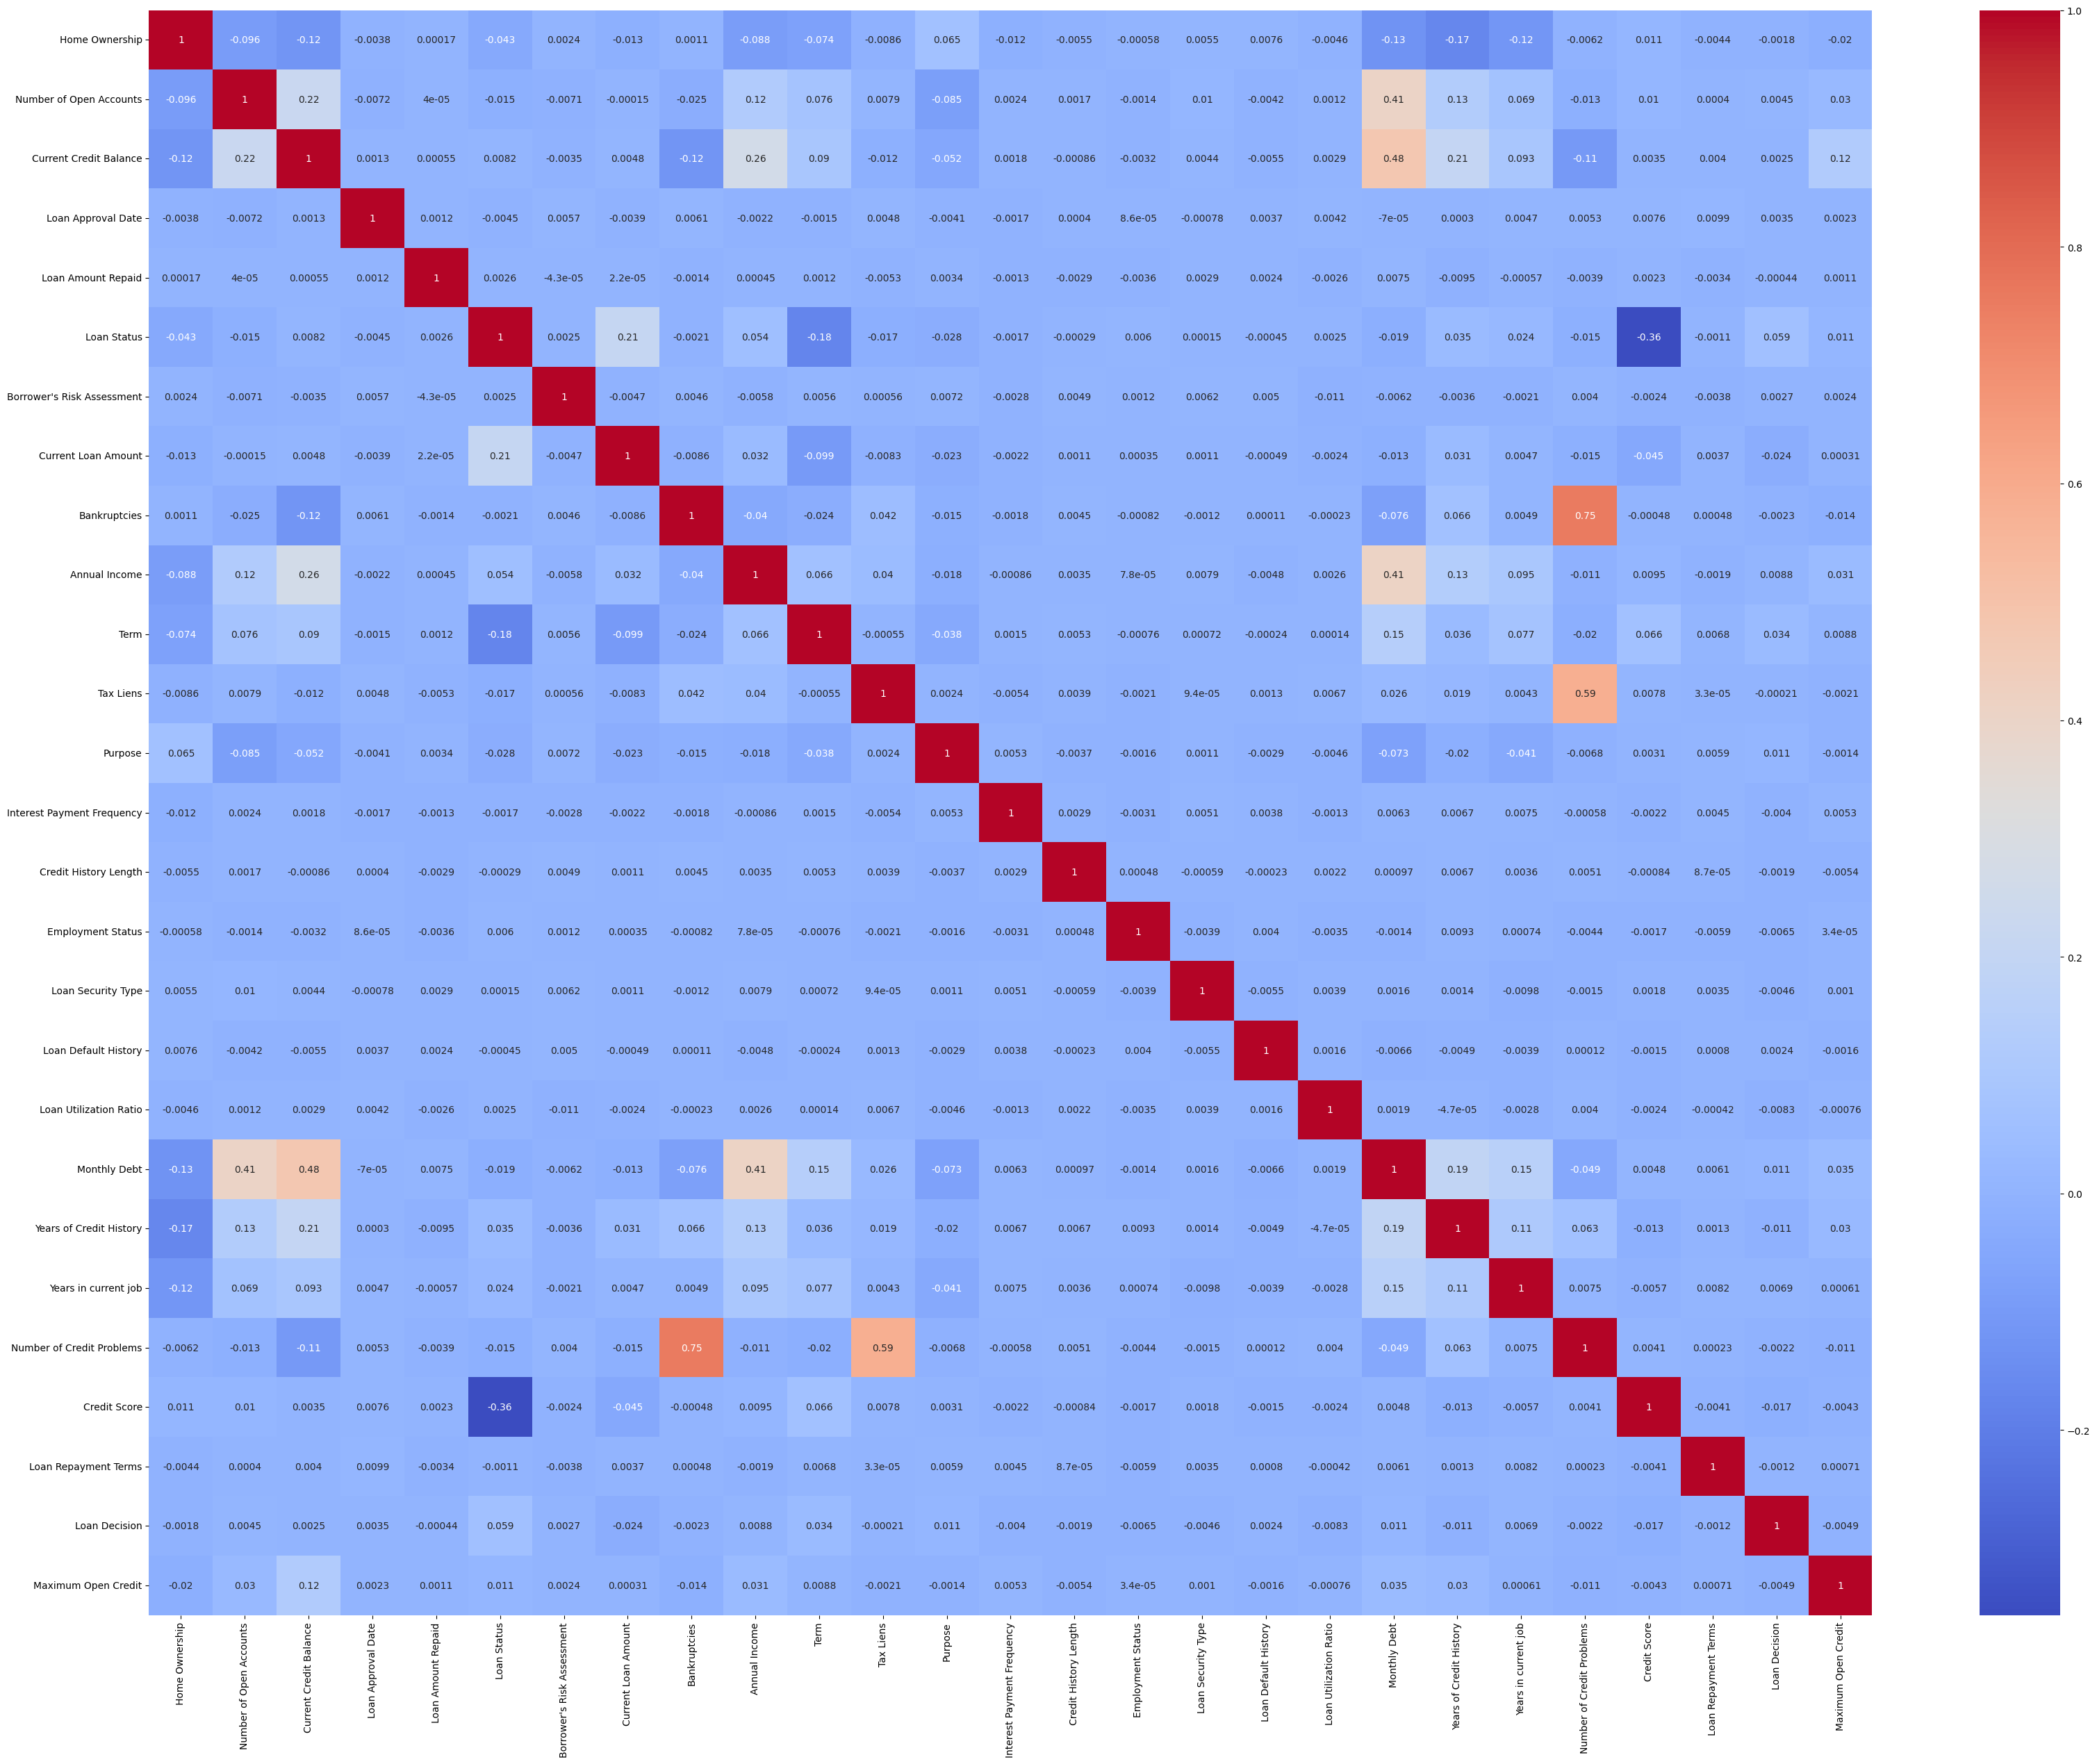

In [4977]:
corr_matrix=Train.corr()
plt.figure(figsize=(40, 30))
sns.heatmap(Train.corr(), annot=True, cmap='coolwarm')
plt.savefig('heatmap.png', dpi=300)

In [ ]:
Train.isna().sum()

Loan ID                             0
Home Ownership                      0
Number of Open Accounts             0
Current Credit Balance              0
Loan Approval Date                  0
Loan Amount Repaid                  0
Months since last delinquent    39368
Loan Status                         0
Borrower's Risk Assessment          0
Current Loan Amount                 0
Bankruptcies                        0
Annual Income                       0
Term                                0
Tax Liens                           0
Purpose                             0
Interest Payment Frequency          0
Credit History Length               0
Employment Status                   0
Loan Security Type                  0
Loan Default History                0
Loan Utilization Ratio              0
Monthly Debt                        0
Years of Credit History             0
Years in current job                0
Credit Score                        0
Loan Repayment Terms                0
Loan Decisio

In [4979]:
Train['Loan Status']

0        4
1        3
2        4
3        3
4        3
        ..
72166    4
72167    4
72168    4
72169    4
72170    4
Name: Loan Status, Length: 72171, dtype: int64

In [4980]:
columns_to_keep = ['Home Ownership', 'Number of Open Accounts', 'Current Credit Balance', 'Current Loan Amount',
                   'Bankruptcies', 'Term', 'Tax Liens', 'Purpose', 'Monthly Debt', 'Years of Credit History',
                   'Years in current job', 'Credit Score', 'Maximum Open Credit']
y=Train.pop('Loan Status')
Train = Train[columns_to_keep]


In [4981]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(Train, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7857984066505023


In [4982]:
sorted(Train.columns)

['Bankruptcies',
 'Credit Score',
 'Current Credit Balance',
 'Current Loan Amount',
 'Home Ownership',
 'Maximum Open Credit',
 'Monthly Debt',
 'Number of Open Accounts',
 'Purpose',
 'Tax Liens',
 'Term',
 'Years in current job',
 'Years of Credit History']